In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

Using Theano backend.


In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


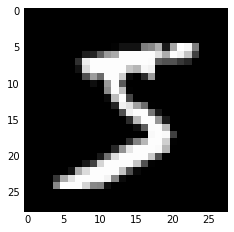

In [4]:
plt.subplot(221)
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))

print x_train.shape,y_train.shape
print x_test.shape,y_test.shape

In [12]:
seed =7
numpy.random.seed(seed)
print x_train.shape[2]

28


In [13]:
num_pixels=x_train.shape[1]*x_train.shape[2]
X_train=x_train.reshape(x_train.shape[0],num_pixels).astype('float32')
X_test=x_test.reshape(x_test.shape[0],num_pixels).astype('float32')
print X_train.shape,y_train.shape
print X_test.shape,y_test.shape


(60000, 784) (60000,)
(10000, 784) (10000,)


In [14]:
X_train=X_train/255
X_test=X_test/255

In [22]:
#converting output labels to binary matrix
i=5
print "Integer:",y_train[i]
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)
print "Binary matrix:",Y_train[i]
print type(Y_train)
print type(y_train)
print Y_test.shape
num_classes=Y_test.shape[1]

Integer: 2
Binary matrix: [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
(10000, 10)


In [16]:
def baselinemodel():
    model=Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,init='normal',activation='relu'))
    model.add(Dense(num_classes,init='normal',activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [17]:
model=baselinemodel()

model.fit(X_train,Y_train,validation_data=(X_test,Y_test),nb_epoch=10,batch_size=200,verbose=2)

scores=model.evaluate(X_test,Y_test,verbose=0)
print("Error: %.2f%% "%(100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
12s - loss: 0.2791 - acc: 0.9203 - val_loss: 0.1421 - val_acc: 0.9578
Epoch 2/10
13s - loss: 0.1123 - acc: 0.9679 - val_loss: 0.0997 - val_acc: 0.9699
Epoch 3/10
15s - loss: 0.0724 - acc: 0.9790 - val_loss: 0.0785 - val_acc: 0.9743
Epoch 4/10
13s - loss: 0.0510 - acc: 0.9854 - val_loss: 0.0778 - val_acc: 0.9769
Epoch 5/10
15s - loss: 0.0365 - acc: 0.9895 - val_loss: 0.0636 - val_acc: 0.9791
Epoch 6/10
13s - loss: 0.0264 - acc: 0.9930 - val_loss: 0.0653 - val_acc: 0.9797
Epoch 7/10
15s - loss: 0.0185 - acc: 0.9957 - val_loss: 0.0608 - val_acc: 0.9808
Epoch 8/10
14s - loss: 0.0148 - acc: 0.9968 - val_loss: 0.0626 - val_acc: 0.9812
Epoch 9/10
13s - loss: 0.0105 - acc: 0.9981 - val_loss: 0.0595 - val_acc: 0.9817
Epoch 10/10
17s - loss: 0.0073 - acc: 0.9988 - val_loss: 0.0600 - val_acc: 0.9819
Error: 1.81% 
